In [1]:
pip install tensorflow keras numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize the data to range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


Add Noise to the Images
Introduce random Gaussian noise to the dataset.

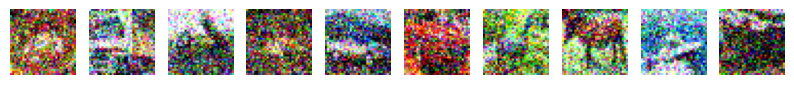

In [3]:
def add_noise(images, noise_factor=0.3):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0.0, 1.0)
    return noisy_images

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Display some noisy images
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train_noisy[i])
    plt.axis("off")
plt.show()


 Build the Autoencoder
Create the encoder and decoder using TensorFlow/Keras.

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Encoder
input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = Conv2D(32, (3, 3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,507 (115.26 KB)

 Trainable params: 29,507 (115.26 KB)

 Non-trainable params: 0 (0.00 B)

Train the Autoencoder
Train the model using the noisy images as input and the clean images as output.

In [5]:
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 126ms/step - loss: 0.6056 - val_loss: 0.5747
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 125ms/step - loss: 0.5733 - val_loss: 0.5719
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 125ms/step - loss: 0.5705 - val_loss: 0.5707
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 121ms/step - loss: 0.5698 - val_loss: 0.5699
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 121ms/step - loss: 0.5689 - val_loss: 0.5694
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - loss: 0.5682 - val_loss: 0.5688
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 122ms/step - loss: 0.5677 - val_loss: 0.5684
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 124ms/step - loss: 0.5673 - val_loss: 0.5681
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 123ms/step - loss: 0.5678 - val_loss: 0.5681
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 122ms/step - loss: 0.5671 - val_loss: 0.5677
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 126ms/step - loss: 0.5666 - val_loss: 0.5674
Epoch 12/20
391/391

Test the Autoencoder
Generate cleaned images using the test dataset.

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


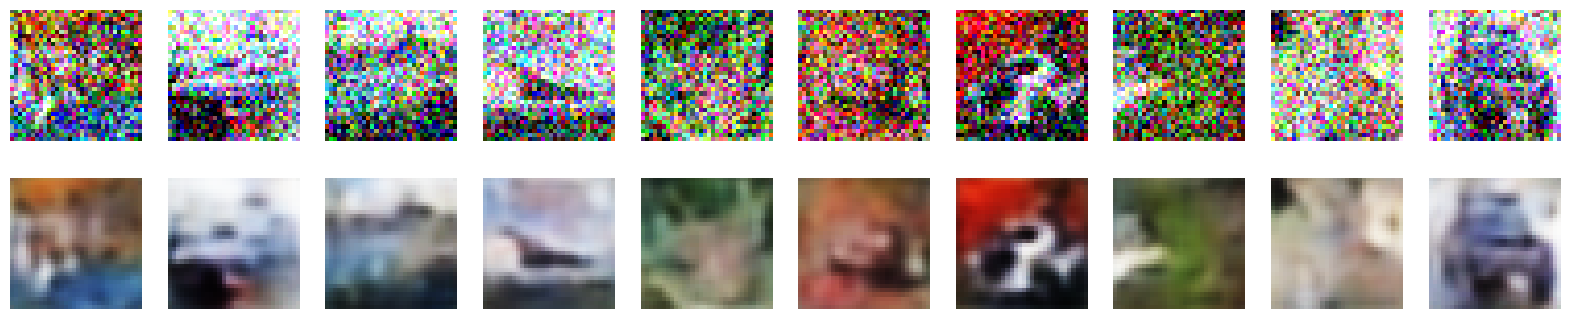

In [6]:
# Denoise the test images
denoised_images = autoencoder.predict(x_test_noisy)

# Display results: noisy vs. denoised
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.axis("off")

    # Denoised image
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(denoised_images[i])
    plt.axis("off")
plt.show()


Save the Model
Save the trained model for future use.

In [7]:
autoencoder.save("cifar10_denoising_autoencoder.h5")
